# Optimal Place for Opening New Restaurant in Istanbul, Turkey

<img src="istanbul.png" width=1200> <p style="text-align: center; font-size:12px;">Photo by Anna on Unsplash</p></img>


**1. Introduction**
- **1.1.** Business Problem
- **1.2.** Data Description  

**2. Methodology**

**3. Application**
- **3.1.** Importing libraries and preparing datasets
- **3.2.** Data Preprocessing
- **3.3.** Visualizing Districts of Istanbul
- **3.4.** Clustering Distincts using K-Means Algorithm

**4. Results**  
**5. Discussion**  
**6. Conclusion**  

## 1. Introduction
Hey everyone! In this project, I am trying find the optimal place for opening a restaurant in Istanbul. Istanbul is the most populous city in Turkey and the country's economic, cultural and historic center [1].

### 1.1. Business Problem
I assume that someone is looking to open a restaurant and trying to find the best place in Istanbul. There are many restaurants and other venues in 39 districts of the city. Finding districts that include fewer restaurants may help to find true place.
### 1.2. Data Description
I have used three data sources for my application. Firstly, scraped a table from "List of districts of Istanbul" page on Wikipedia [2]. This dataset was not include latitude and longitude values of districts. Therefore, I googled coordinates of districts and found a website, in Turkish [3]. After merging this datasets, my final dataset created.

And of course, I have used Foursquare API to find venues in Istanbul.

## 2. Methodology
There are many parameters can influence the decision. I think, the most important feature to decide we should open or not new restaurant in spesific distinct, finding how many restaurants there are. Because if there are many restaurants in a distinct, opening a new restaurant requires competitive processes. And competition requires more many, effort and time.

Therefore I have used venues dataset and clustered distincts using KMeans Algorithm. To find an optimal "k" value, iteratively processed the algorithm and used Elbow method. Even it did not give obvious result, I think used a good hyperparameter.

After clustering the distincts, I have visualised clustered distincts in map using Folium. I also added "Annual household income TL(USD)" information to interpret results and make robust decision.



## 3. Application

### 3.1. Importing libraries and preparing the dataset

In [1]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
from urllib.request import urlopen
import requests
import folium
from geopy.geocoders import Nominatim
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors

In [2]:
with urlopen('https://en.wikipedia.org/wiki/List_of_districts_of_Istanbul') as response:
    soup = BeautifulSoup(response, 'html.parser')

    table = soup.find_all('table', {'class': 'wikitable sortable'})
df = pd.read_html(str(table))[0]

In [3]:
df.head()

,District,Population (2019),Area (km²),Density (per km²),Mensual household income TL(USD),Annual household income TL(USD)
0,Adalar,15238,11.05,1379,6.652₺ (918$),"79.821₺ (10,978$)"
1,Arnavutköy,282488,450.35,627,2.030₺ (279$),"24.360₺ (3,350$)"
2,Ataşehir,425094,25.23,16849,6.577₺ (904$),"78.924₺ (10,854$)"
3,Avcılar,448882,42.01,10685,3.662₺ (503$),"43.938₺ (6,064$)"
4,Bağcılar,745125,22.36,33324,3.197₺ (441$),"38.367₺ (5,295$)"


In [4]:
ist = pd.read_excel('ist.xlsx')
ist.head()

,District,Latitude,Longitude
0,Adalar,40.8747,29.1294
1,Arnavutköy,41.1864,28.7389
2,Ataşehir,40.9833,29.1278
3,Avcılar,40.9792,28.7214
4,Bağcılar,41.0341,28.8330


By merging these two datasets, we have all districts and their coordinates, as you can see below.

In [5]:
df = df.merge(ist, on = 'District', how='left')
df.head()

,District,Population (2019),Area (km²),Density (per km²),Mensual household income TL(USD),Annual household income TL(USD),Latitude,Longitude
0,Adalar,15238,11.05,1379,6.652₺ (918$),"79.821₺ (10,978$)",40.8747,29.1294
1,Arnavutköy,282488,450.35,627,2.030₺ (279$),"24.360₺ (3,350$)",41.1864,28.7389
2,Ataşehir,425094,25.23,16849,6.577₺ (904$),"78.924₺ (10,854$)",40.9833,29.1278
3,Avcılar,448882,42.01,10685,3.662₺ (503$),"43.938₺ (6,064$)",40.9792,28.7214
4,Bağcılar,745125,22.36,33324,3.197₺ (441$),"38.367₺ (5,295$)",41.0341,28.8330


### 3.2. Data Preprocessing
The dataset has some redundant rows like total values, Asia and Europe districts. After dropping null columns, everything is OK.

In [6]:
df.dropna(subset=['Latitude', 'Longitude'], inplace=True)

In [7]:
print("There are {} (districts) rows.".format(df.shape[0]))

There are 39 (districts) rows.


In [8]:
df['Latitude'] = df['Latitude'].astype('float64')
df['Longitude'] = df['Longitude'].astype('float64')

In [9]:
df.head()

,District,Population (2019),Area (km²),Density (per km²),Mensual household income TL(USD),Annual household income TL(USD),Latitude,Longitude
0,Adalar,15238,11.05,1379,6.652₺ (918$),"79.821₺ (10,978$)",40.8747,29.1294
1,Arnavutköy,282488,450.35,627,2.030₺ (279$),"24.360₺ (3,350$)",41.1864,28.7389
2,Ataşehir,425094,25.23,16849,6.577₺ (904$),"78.924₺ (10,854$)",40.9833,29.1278
3,Avcılar,448882,42.01,10685,3.662₺ (503$),"43.938₺ (6,064$)",40.9792,28.7214
4,Bağcılar,745125,22.36,33324,3.197₺ (441$),"38.367₺ (5,295$)",41.0341,28.8330


### 3.3. Visualizing Districts of Istanbul

In [10]:
address = 'Istanbul'
geolocator = Nominatim(user_agent="istanbul_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 41.0096334, 28.9651646.


In [11]:
# create map of Toronto using latitude and longitude values
map_Istanbul = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(df['Latitude'], df['Longitude'], df['District'], df['Population (2019)']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        ).add_to(map_Istanbul)  
    
map_Istanbul

### 3.4. Getting the Venues using Foursquare API

In [12]:
CLIENT_ID = '4AY25NSGNTM50N5CG2OIHD2IBKNPPUNBIVETKEPUT1CCCJSI' # your Foursquare ID
CLIENT_SECRET = 'SIMKHSDQWQ4TZIPSFGRGZ20PEQSEPFCND32MSBJWBIHSQPXW' # your Foursquare Secret
VERSION = '20180604' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 4AY25NSGNTM50N5CG2OIHD2IBKNPPUNBIVETKEPUT1CCCJSI
CLIENT_SECRET:SIMKHSDQWQ4TZIPSFGRGZ20PEQSEPFCND32MSBJWBIHSQPXW


In [13]:
district_latitude = df.loc[0, 'Latitude'] # neighborhood latitude value
district_longitude = df.loc[0, 'Longitude'] # neighborhood longitude value

district_name = df.loc[0, 'District'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(district_name, 
                                                               district_latitude, 
                                                               district_longitude))

Latitude and longitude values of Adalar are 40.8747, 29.1294.


In [14]:
LIMIT = 100
radius = 500
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    district_latitude, 
    district_longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=4AY25NSGNTM50N5CG2OIHD2IBKNPPUNBIVETKEPUT1CCCJSI&client_secret=SIMKHSDQWQ4TZIPSFGRGZ20PEQSEPFCND32MSBJWBIHSQPXW&v=20180604&ll=40.8747,29.1294&radius=500&limit=100'

In [15]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        try:
            results = requests.get(url).json()["response"]['groups'][0]['items']
        except:
            
            pass
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['District', 
                  'District Latitude', 
                  'District Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [16]:
istanbul_venues = getNearbyVenues(names=df['District'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

Adalar
Arnavutköy
Ataşehir
Avcılar
Bağcılar
Bahçelievler
Bakırköy
Başakşehir
Bayrampaşa
Beşiktaş
Beykoz
Beylikdüzü
Beyoğlu
Büyükçekmece
Çatalca
Çekmeköy
Esenler
Esenyurt
Eyüpsultan
Fatih
Gaziosmanpaşa
Güngören
Kadıköy
Kağıthane
Kartal
Küçükçekmece
Maltepe
Pendik
Sancaktepe
Sarıyer
Silivri
Sultanbeyli
Sultangazi
Şile
Şişli
Tuzla
Ümraniye
Üsküdar
Zeytinburnu


In [17]:
print(istanbul_venues.shape)
istanbul_venues.head()

(2023, 7)


,District,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Adalar,40.8747,29.1294,Büyükada Şekercisi Candy Island Cafe Patisserie,40.873782,29.131028,Breakfast Spot
1,Adalar,40.8747,29.1294,Ada Palas Butik Hotel,40.873586,29.129960,Hotel
2,Adalar,40.8747,29.1294,Sarıyer dondurmacısı,40.873561,29.128408,Ice Cream Shop
3,Adalar,40.8747,29.1294,Büyükada Cumbalı Konak Hotel,40.874018,29.130407,Hotel
4,Adalar,40.8747,29.1294,Eskibağ Butik Hotel,40.872934,29.129092,Hotel


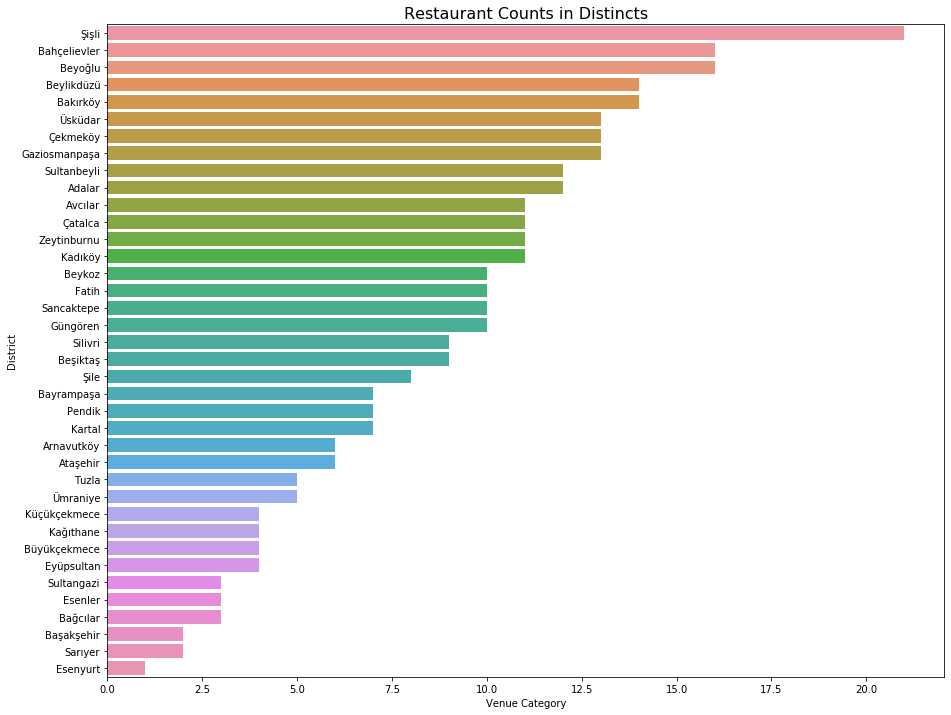

In [18]:
dist_restaurants = istanbul_venues[istanbul_venues['Venue Category'].str.contains('Restaurant')].groupby('District').count()['Venue Category'].reset_index()
dist_restaurants.sort_values(by='Venue Category', ascending=False, inplace=True)

plt.figure(figsize=(15,12))
sns.barplot(x='Venue Category', y='District', data=dist_restaurants)
plt.title('Restaurant Counts in Distincts', size=16)
plt.show()

In [19]:
istanbul_venues.groupby('District').count()

,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
District,,,,,,
Adalar,75,75,75,75,75,75
Arnavutköy,44,44,44,44,44,44
Ataşehir,60,60,60,60,60,60
Avcılar,100,100,100,100,100,100
Bahçelievler,59,59,59,59,59,59
Bakırköy,100,100,100,100,100,100
Bayrampaşa,46,46,46,46,46,46
Bağcılar,35,35,35,35,35,35
Başakşehir,6,6,6,6,6,6


In [20]:
print('There are {} uniques categories.'.format(len(istanbul_venues['Venue Category'].unique())))

There are 250 uniques categories.


In [21]:
istanbul_onehot = pd.get_dummies(istanbul_venues[['Venue Category']], prefix="", prefix_sep="")

istanbul_onehot['District'] = istanbul_venues['District'] 

fixed_columns = [istanbul_onehot.columns[-1]] + list(istanbul_onehot.columns[:-1])
istanbul_onehot = istanbul_onehot[fixed_columns]

istanbul_onehot.head()

,District,Accessories Store,African Restaurant,Airport,American Restaurant,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Art Gallery,...,Waterfall,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Çöp Şiş Place
0,Adalar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Adalar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Adalar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Adalar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Adalar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
istanbul_onehot.shape

(2023, 251)

In [23]:
istanbul_grouped = istanbul_onehot.groupby('District').mean().reset_index()
print(istanbul_grouped.shape)
istanbul_grouped.head()

(39, 251)


,District,Accessories Store,African Restaurant,Airport,American Restaurant,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Art Gallery,...,Waterfall,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Çöp Şiş Place
0,Adalar,0.000000,0.0,0.000000,0.013333,0.0,0.0,0.00,0.0,0.013333,...,0.0,0.013333,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.000000
1,Arnavutköy,0.000000,0.0,0.022727,0.000000,0.0,0.0,0.00,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.000000
2,Ataşehir,0.016667,0.0,0.000000,0.000000,0.0,0.0,0.00,0.0,0.033333,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.016667
3,Avcılar,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.02,0.0,0.010000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.02,0.0,0.0,0.000000
4,Bahçelievler,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.00,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.016949


In [24]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [25]:
num_top_venues = 5
for dist in istanbul_grouped['District']:
    print("----"+dist+"----")
    temp = istanbul_grouped[istanbul_grouped['District'] == dist].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adalar----
                venue  freq
0               Hotel  0.20
1                Café  0.11
2      Breakfast Spot  0.07
3  Seafood Restaurant  0.07
4      Ice Cream Shop  0.05


----Arnavutköy----
                venue  freq
0                Café  0.23
1          Restaurant  0.07
2         Kofte Place  0.05
3  Turkish Restaurant  0.05
4          Bagel Shop  0.05


----Ataşehir----
            venue  freq
0  Clothing Store  0.08
1            Café  0.07
2     Coffee Shop  0.05
3    Soccer Field  0.05
4  Soccer Stadium  0.03


----Avcılar----
                  venue  freq
0                  Café  0.24
1          Dessert Shop  0.06
2  Gym / Fitness Center  0.05
3           Coffee Shop  0.04
4    Turkish Restaurant  0.04


----Bahçelievler----
                             venue  freq
0               Turkish Restaurant  0.12
1                             Café  0.08
2                 Kebab Restaurant  0.05
3  Turkish Home Cooking Restaurant  0.05
4                             Park  0.0

In [26]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:num_top_venues]

In [27]:
num_top_venues = 10
indicators = ['st', 'nd', 'rd']

columns = ['District']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

districts_venues_sorted = pd.DataFrame(columns=columns)
districts_venues_sorted['District'] = istanbul_grouped['District']

for ind in np.arange(istanbul_grouped.shape[0]):
    districts_venues_sorted.iloc[ind, 1:] = return_most_common_venues(istanbul_grouped.iloc[ind, :], num_top_venues)

districts_venues_sorted.shape

(39, 11)

In [28]:
districts_venues_sorted.head()

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adalar,Hotel,Café,Breakfast Spot,Seafood Restaurant,Ice Cream Shop,Restaurant,Dessert Shop,Plaza,Bar,Boat or Ferry
1,Arnavutköy,Café,Restaurant,Dessert Shop,Bagel Shop,Turkish Restaurant,Coffee Shop,Kofte Place,Shopping Mall,Grocery Store,Pharmacy
2,Ataşehir,Clothing Store,Café,Coffee Shop,Soccer Field,Furniture / Home Store,Art Gallery,Park,Soccer Stadium,Stadium,Pool
3,Avcılar,Café,Dessert Shop,Gym / Fitness Center,Turkish Restaurant,Coffee Shop,Breakfast Spot,Restaurant,Steakhouse,Bistro,Boutique
4,Bahçelievler,Turkish Restaurant,Café,Kebab Restaurant,Turkish Home Cooking Restaurant,Park,Burger Joint,Dessert Shop,Bakery,Steakhouse,Ice Cream Shop


### 3.4. Clustering Distincts using K-Means Algorithm

In [29]:
istanbul_grouped.drop('District', 1).head()

,Accessories Store,African Restaurant,Airport,American Restaurant,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Art Gallery,Art Museum,...,Waterfall,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Çöp Şiş Place
0,0.000000,0.0,0.000000,0.013333,0.0,0.0,0.00,0.0,0.013333,0.0,...,0.0,0.013333,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.000000
1,0.000000,0.0,0.022727,0.000000,0.0,0.0,0.00,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.000000
2,0.016667,0.0,0.000000,0.000000,0.0,0.0,0.00,0.0,0.033333,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.016667
3,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.02,0.0,0.010000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.02,0.0,0.0,0.000000
4,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.00,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.016949


In [30]:
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
istanbul_grouped_clustering = istanbul_grouped.drop('District', 1)
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(istanbul_grouped_clustering)
    Sum_of_squared_distances.append(km.inertia_)

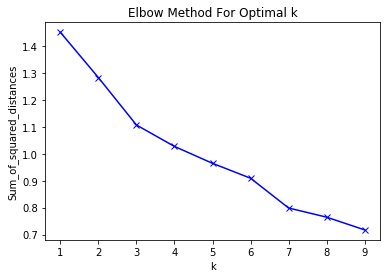

In [31]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [32]:
from sklearn.cluster import KMeans
kclusters = 4
kmeans = KMeans(n_clusters=kclusters, random_state=42).fit(istanbul_grouped_clustering)
print(kmeans.labels_)
print(len(kmeans.labels_))

[3 2 3 2 1 1 1 2 0 3 1 3 3 3 1 3 1 1 1 1 3 1 1 1 3 1 2 2 1 1 2 2 1 1 1 1 2
 3 1]
39


In [33]:
# districts_venues_sorted.drop('Cluster Labels', axis=1, inplace=True)
districts_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
istanbul_merged = df
istanbul_merged = istanbul_merged.join(districts_venues_sorted.set_index('District'), on='District')

istanbul_merged.head() # check the last columns!

,District,Population (2019),Area (km²),Density (per km²),Mensual household income TL(USD),Annual household income TL(USD),Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adalar,15238,11.05,1379,6.652₺ (918$),"79.821₺ (10,978$)",40.8747,29.1294,3,Hotel,Café,Breakfast Spot,Seafood Restaurant,Ice Cream Shop,Restaurant,Dessert Shop,Plaza,Bar,Boat or Ferry
1,Arnavutköy,282488,450.35,627,2.030₺ (279$),"24.360₺ (3,350$)",41.1864,28.7389,2,Café,Restaurant,Dessert Shop,Bagel Shop,Turkish Restaurant,Coffee Shop,Kofte Place,Shopping Mall,Grocery Store,Pharmacy
2,Ataşehir,425094,25.23,16849,6.577₺ (904$),"78.924₺ (10,854$)",40.9833,29.1278,3,Clothing Store,Café,Coffee Shop,Soccer Field,Furniture / Home Store,Art Gallery,Park,Soccer Stadium,Stadium,Pool
3,Avcılar,448882,42.01,10685,3.662₺ (503$),"43.938₺ (6,064$)",40.9792,28.7214,2,Café,Dessert Shop,Gym / Fitness Center,Turkish Restaurant,Coffee Shop,Breakfast Spot,Restaurant,Steakhouse,Bistro,Boutique
4,Bağcılar,745125,22.36,33324,3.197₺ (441$),"38.367₺ (5,295$)",41.0341,28.8330,2,Café,Turkish Restaurant,Coffee Shop,Park,Notary,Business Service,Big Box Store,Breakfast Spot,Burger Joint,Paper / Office Supplies Store


In [34]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = ['red', 'orange', 'blue','green' ]

markers_colors = []
for lat, lon, poi, inc, cluster in zip(istanbul_merged['Latitude'], istanbul_merged['Longitude'], istanbul_merged['District'], istanbul_merged['Annual household income TL(USD)'],kmeans.labels_):
    label = folium.Popup(str(poi) + "\n" + str(inc) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker([lat, lon], radius=5, popup=label, color=rainbow[cluster-1], fill=True, fill_color=rainbow[cluster-1], fill_opacity=0.9).add_to(map_clusters)
map_clusters

In [35]:
istanbul_merged.groupby('Cluster Labels').agg(lambda x:x.value_counts().index[0])[['1st Most Common Venue', '2nd Most Common Venue', '3rd Most Common Venue', '4th Most Common Venue']]

,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue
Cluster Labels,,,,
0,Restaurant,Toll Plaza,Business Service,Gastropub
1,Café,Turkish Restaurant,Dessert Shop,Turkish Restaurant
2,Café,Turkish Restaurant,Dessert Shop,Park
3,Café,Café,Breakfast Spot,Turkish Home Cooking Restaurant


## 4.Results
I have clustered 39 distincts of Istanbul. When we look the most common venues of clusters:
- Cluster 0: The most common venue is restaurant and this distincts will be a bad choice for opening a new restaurant.
- Cluster 1-2: Even the 1st most common venue is not restaurant, these cluster also includes many restaurants and doesn't seem a good choice.
- Cluster 3: This is the optimal distincts for opening a restaurant as result. In the map above, blue markers show Cluster 3 and their annual household income.  

## 5. Discussion
As noticed before, finding the optimal place for opening a restaurant have many parameters. In this project's results, I found a general result about finding the optimal distinct by using venues data and unsupervised learning algorithm. It is possible to get better results by using given specific parameters. 

## 6. Conclusion
This project is just an example of using machine learning algorithm to make decision for real-life problems. Even so, while designing all parts and coding my ideas, I learned many things! It is possible to create nice datasets with scraping, use these datasets to build machine learning models and decision-making.

Thank you so much! :)

**Tolgahan Çepel**

### Sources

[1] https://en.wikipedia.org/wiki/Istanbul  
[2] https://en.wikipedia.org/wiki/List_of_districts_of_Istanbul  
[3] http://dunya.arztalep.com/tr-TR/istanbul/istanbul-haritasi.aspx